In [1]:
using Pkg
pkg"activate ."
pkg"instantiate"

 Activating environment at `~/Documents/otimizacao-em-julia/notebooks/Project.toml`


In [4]:
using Plots, Interact
gr(size=(600,400))

Plots.GRBackend()

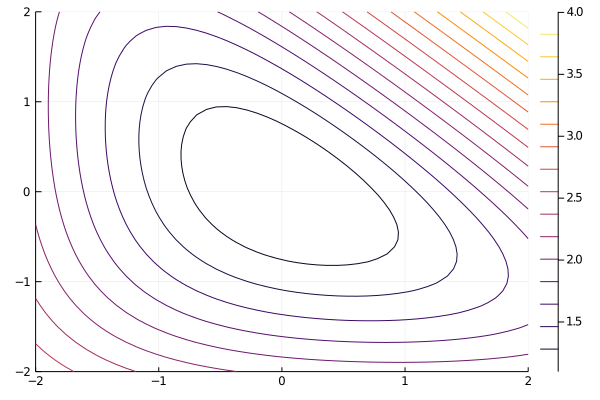

In [9]:
xg = range(-2, 2, length=50)
yg = copy(xg)

f(x) = log(exp(-x[1]) + exp(-x[2]) + exp(x[1] + x[2]))
contour(xg, yg, (x,y) -> f([x;y]))

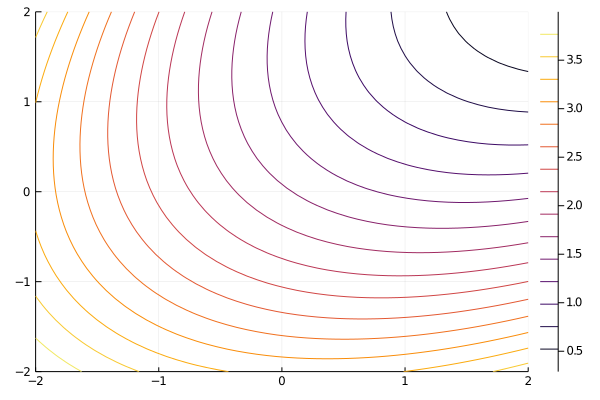

In [11]:
using ForwardDiff, LinearAlgebra

x = [-1.0; -1.0]
∇f(x) = ForwardDiff.gradient(f, x)
H(x) = ForwardDiff.hessian(f, x)
fx = f(x)
gx = ∇f(x)
Hx = H(x)
m(d) = fx + dot(gx, d) + dot(d, Hx * d) / 2
contour(xg, yg, (x,y) -> m([x;y]))

In [12]:
Hx

2×2 Array{Float64,2}:
  0.29725   -0.190605
 -0.190605   0.29725

In [13]:
eigen(Hx).values

2-element Array{Float64,1}:
 0.10664526207955279
 0.48785555116036844

In [14]:
d = -Hx \ gx

2-element Array{Float64,1}:
 4.346809642000827
 4.346809642000827

In [16]:
f(x)

1.7177359186667025

In [17]:
f(x + d)

6.6937064823345915

In [57]:

using Interact

xg = range(-2, 2, length=50)
yg = copy(xg)
f(x) = x[1]^2 + x[2]^2
# f(x) = log(exp(-x[1]) + exp(-x[2]) + exp(x[1] + x[2]))
∇f(x) = ForwardDiff.gradient(f, x)
H(x) = ForwardDiff.hessian(f, x)

@manipulate for x1 = xg, x2 = yg
    x = [x1; x2]
    fx = f(x)
    gx = ∇f(x)
    Hx = H(x)
    m(d) = fx + dot(gx, d) + dot(d, Hx * d) / 2
    q(y) = m(y - x)

    surface(xg, yg, (x,y) -> f([x;y]), c=:gray, levels=0:0.5:4)
    scatter!([x1], [x2], [f(x)], c=:red, ms=3)
    surface!(xg, yg, (x,y) -> q([x;y]), leg=false, levels=10)
    d = -Hx \ gx
    plot!([x1, x1+d[1]], [x2, x2+d[2]], [f(x), f(x+d)], c=:red, l=:arrow)
end

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x1"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 50,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
25, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/abel/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/abel/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/abel/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/home/abel/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/home/abel/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f72b19c9390, Task (runnable) @0x00007f72b19c9390), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-2.0\",\"-1.91837\",\"-1.83673\",\"-1.7551\",\"-1.67347\",\"-1.59184\",\"-1.5102\",\"-1.42857\",\"-1.34694\",\"-1.26531\",\"-1.18367\",\"-1.10204\",\"-1.02041\",\"-0.938776\",\"-0.857143\",\"-0.77551\",\"-0.693878\",\"-0.612245\",\"-0.530612\",\"-0.44898\",

## Busca linear

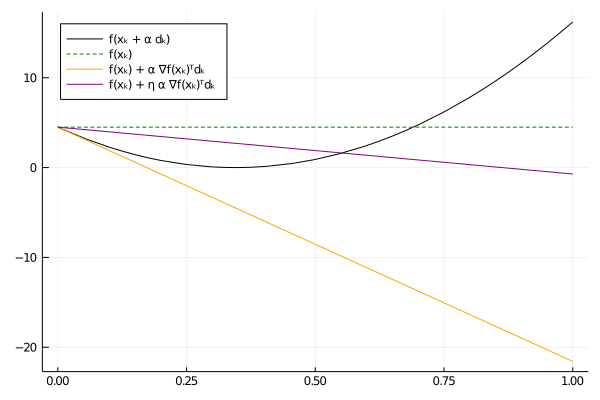

In [60]:
ϕ(t) = f(x + t * d)
plot(ϕ, 0, 1, c=:black, lab="f(xₖ + α dₖ)", leg=:topleft)
plot!(t -> f(x), 0, 1, c=:green, l=:dash, lab="f(xₖ)")
plot!(t -> f(x) + t * dot(d, ∇f(x)), 0, 1, c=:orange, lab="f(xₖ) + α ∇f(xₖ)ᵀdₖ")
η = 0.2
plot!(t -> f(x) + η * t * dot(d, ∇f(x)), 0, 1, c=:purple, lab="f(xₖ) + η α ∇f(xₖ)ᵀdₖ")

In [65]:
function newton(f, x)
    ∇f(x) = ForwardDiff.gradient(f, x)
    H(x) = ForwardDiff.hessian(f, x)
    η = 1e-2
    num_backtrack = 0
    
    iter = 0
    while norm(∇f(x)) > 1e-4
        d = -H(x) \ ∇f(x)
        
        # Armijo
        α = 1.0
        while f(x + α * d) ≥ f(x) + η * α * dot(d, ∇f(x))
            α = α / 2
            num_backtrack = num_backtrack + 1
            if α < 1e-8
                error("Erro no backtracking")
            end
        end
        x = x + α * d
        
        iter += 1
        if iter > 1000
            error("Nao converge")
        end
    end
    
    return x, iter, num_backtrack
end

newton (generic function with 1 method)

In [73]:
f(x) = log(exp(-x[1]) + exp(-x[2]) + exp(x[1] + x[2]))
x, iter, nbk = newton(f, [10.0; 2.0])

([-0.00010443652168035458, 0.00011267818209640713], 7, 45)

In [74]:
∇f(x)

2-element Array{Float64,1}:
 -3.206676020189889e-5
  4.03045093499723e-5

## Região de Confiança

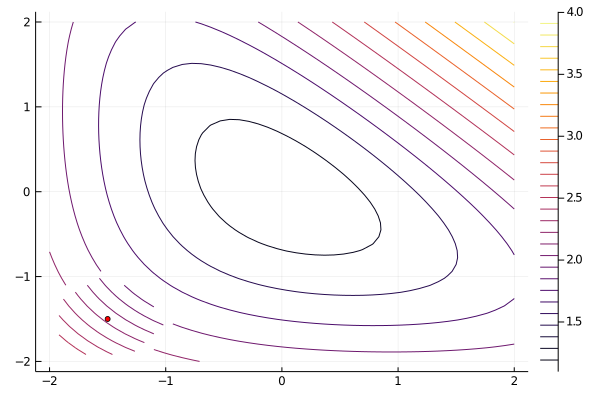

┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495


In [44]:
using Interact
gr(size=(600,400))

xg = range(-2, 2, length=50)
yg = copy(xg)
f(x) = log(exp(-x[1]) + exp(-x[2]) + exp(x[1] + x[2]))
Δ = 0.5

# @manipulate for x1 = xg, x2 = yg
    x1 = -1.5
    x2 = -1.5
    x = [x1; x2]
    fx = f(x)
    gx = ∇f(x)
    Hx = H(x)
    fnan(y) = norm(y - x) ≥ Δ ? f(y) : NaN
    m(d) = norm(d) ≤ Δ ? fx + dot(gx, d) + dot(d, Hx * d) / 2 : NaN
    q(y) = m(y - x)

    contour(xg, yg, (x,y) -> fnan([x;y]), levels=0:0.25:4)
    scatter!([x1], [x2], c=:red, ms=3)
    contour!(xg, yg, (x,y) -> q([x;y]), leg=false, levels=30)
#     d = -Hx \ gx
#     plot!([x1, x1+d[1]], [x2, x2+d[2]], c=:red, l=:arrow)
# end

In [115]:
using Interact
using JuMP, Ipopt
gr(size=(600,400))

xg = range(-2, 2, length=100)
yg = copy(xg)
f(x) = log(exp(-x[1]) + exp(-x[2]) + exp(x[1] + x[2]))
# Δ = 0.5
θ = range(0, 2π, length=60)

@manipulate for x1 = xg, x2 = yg, Δ = range(0.1, 2.0, length=50)
    x = [x1; x2]
    fx = f(x)
    gx = ∇f(x)
    Hx = H(x)
    fnan(y) = norm(y - x) ≥ Δ ? f(y) : NaN
    m(d) = norm(d) ≤ Δ ? fx + dot(gx, d) + dot(d, Hx * d) / 2 : NaN
    q(y) = m(y - x)

    model = Model(with_optimizer(Ipopt.Optimizer, print_level=0))
    @variable(model, d[1:2])
    @NLobjective(model, Min, fx + sum(gx[i] * d[i] for i = 1:2) +
        sum(Hx[i,j] * d[i] * d[j] for i = 1:2, j = 1:2) / 2)
    @NLconstraint(model, d[1]^2 + d[2]^2 ≤ Δ^2)
    optimize!(model)
    d = value.(d)

    contour(xg, yg, (x,y) -> fnan([x;y]), levels=0:0.25:4)
    
    scatter!([x1], [x2], c=:red, ms=3)
    contour!(xg, yg, (x,y) -> q([x;y]), leg=false, levels=30)
    plot!([x1, x1+d[1]], [x2, x2+d[2]], c=:red, l=:arrow)
    plot!(x1 .+ Δ * cos.(θ), x2 .+ Δ * sin.(θ), c=:green)
    xlims!(extrema(xg)...)
    ylims!(extrema(yg)...)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x1"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/abel/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/abel/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/abel/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/home/abel/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/home/abel/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f72bd054280, Task (runnable) @0x00007f72bd054280), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-2.0\",\"-1.9596\",\"-1.91919\",\"-1.87879\",\"-1.83838\",\"-1.79798\",\"-1.75758\",\"-1.71717\",\"-1.67677\",\"-1.63636\",\"-1.59596\",\"-1.55556\",\"-1.51515\",\"-1.47475\",\"-1.43434\",\"-1.39394\",\"-1.35354\",\"-1.31313\",\"-1.27273\",\"-1.23232\",\"-

┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Col

┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Col

┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/abel/.julia/packages/Plots/qcY0P/src/backends/gr.jl:495
┌ Warning: Multiple series with different levels share a colorbar. Col

In [129]:
using JuMP, Ipopt

function newton_rc(f, x)
    ∇f(x) = ForwardDiff.gradient(f, x)
    H(x) = ForwardDiff.hessian(f, x)
    η₁ = 1e-2
    η₂ = 0.75
    Δ = 1.0
    iter = 0
    while norm(∇f(x)) > 1e-4
        fx = f(x)
        gx = ∇f(x)
        Hx = H(x)
        model = Model(with_optimizer(Ipopt.Optimizer, print_level=0))
        @variable(model, d[1:2])
        @objective(model, Min, fx + dot(d, gx) + dot(d, Hx * d) / 2)
        @NLconstraint(model, d[1]^2 + d[2]^2 ≤ Δ^2)
        optimize!(model)
        d = value.(d)
        
        Ared = f(x) - f(x + d)
        Pred = f(x) - (fx + dot(d, gx) + dot(d, Hx * d) / 2)
        ρ = Ared / Pred
        if ρ < η₁
            Δ = Δ / 2
        elseif ρ < η₂
            x = x + d
        else
            x = x + d
            Δ = 2Δ
        end
        
        iter += 1
        if iter > 1000
            error("Nao converge")
        end
    end
    
    return x, iter
end

newton_rc (generic function with 1 method)

In [130]:
newton_rc(f, [-1.0; -1.0])

([3.621939451041792e-6, 3.621939451042659e-6], 4)

In [131]:
f(x) = (x[1] - 1)^2 + 100 * (x[2] - x[1]^2)^2
newton_rc(f, [-1.2; 1.0])

([0.9999989833284332, 0.9999979640698674], 31)